In [1]:
library(rvest)
library(dplyr)
library(ggplot2)

Loading required package: xml2

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
hweb = read_html("http://hdr.undp.org/en/composite/HDI")

In [3]:
html_nodes(hweb, 'table')

{xml_nodeset (1)}
[1] <table border="0" cellpadding="0" cellspacing="0" width="2268" style="bor ...

In [4]:
hweb2 = html_nodes(hweb, 'table') %>% .[[1]] %>% html_table(fill = TRUE)
hweb2

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
,Table 1. Human Development Index and its components,,,,,,,,,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
,,,,SDG 3,,SDG 4.3,,SDG 4.6,,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
,,Human Development Index (HDI),,Life expectancy at birth,,Expected years of schooling,,Mean years of schooling,,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
HDI rank,Country,Value,,(years),,(years),,(years),,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
,,2017,,2017,,2017,a,2017,a,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
,VERY HIGH HUMAN DEVELOPMENT,VERY HIGH HUMAN DEVELOPMENT,VERY HIGH HUMAN DEVELOPMENT,VERY HIGH HUMAN DEVELOPMENT,VERY HIGH HUMAN DEVELOPMENT,VERY HIGH HUMAN DEVELOPMENT,VERY HIGH HUMAN DEVELOPMENT,VERY HIGH HUMAN DEVELOPMENT,VERY HIGH HUMAN DEVELOPMENT,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,Norway,0.953,,82.3,,17.9,,12.6,,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,Switzerland,0.944,,83.5,,16.2,,13.4,,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,Australia,0.939,,83.1,,22.9,b,12.9,,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,Ireland,0.938,,81.6,,19.6,b,12.5,c,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [5]:
hweb2 = filter(hweb2, X1!='', X1!='...', X1!='..')
hweb2

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
HDI rank,Country,Value,,(years),,(years),,(years),,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,Norway,0.953,,82.3,,17.9,,12.6,,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,Switzerland,0.944,,83.5,,16.2,,13.4,,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,Australia,0.939,,83.1,,22.9,b,12.9,,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,Ireland,0.938,,81.6,,19.6,b,12.5,c,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,Germany,0.936,,81.2,,17.0,,14.1,,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,Iceland,0.935,,82.9,,19.3,b,12.4,c,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,"Hong Kong, China (SAR)",0.933,,84.1,,16.3,,12.0,,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,Sweden,0.933,,82.6,,17.6,,12.4,,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
9,Singapore,0.932,,83.2,,16.2,d,11.5,,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [6]:
hweb3 = subset(hweb2, select=-c(X4,X6,X8,X10,X12,X14,X16:X31))
hweb3 = filter(hweb3, X2!="Country")
colnames(hweb3) = c("HDI_rank_2017", "Country", "HDI_Value", "Life_expectancy_at_birth_in_years", "Expected_years_of_schooling_in_years",
                    "Mean_years_of_schooling_in_years", "GNI_per_capita_in_USdollars", "GNI_per_capita_rank_-_HDI_rank", "HDI_rank_2016")
hweb3

HDI_rank_2017,Country,HDI_Value,Life_expectancy_at_birth_in_years,Expected_years_of_schooling_in_years,Mean_years_of_schooling_in_years,GNI_per_capita_in_USdollars,GNI_per_capita_rank_-_HDI_rank,HDI_rank_2016
1,Norway,0.953,82.3,17.9,12.6,"68,012",5,1
2,Switzerland,0.944,83.5,16.2,13.4,"57,625",8,2
3,Australia,0.939,83.1,22.9,12.9,"43,560",18,3
4,Ireland,0.938,81.6,19.6,12.5,"53,754",8,4
5,Germany,0.936,81.2,17.0,14.1,"46,136",13,4
6,Iceland,0.935,82.9,19.3,12.4,"45,810",13,6
7,"Hong Kong, China (SAR)",0.933,84.1,16.3,12.0,"58,420",2,8
7,Sweden,0.933,82.6,17.6,12.4,"47,766",9,7
9,Singapore,0.932,83.2,16.2,11.5,"82,503",-6,8
10,Netherlands,0.931,82.0,18.0,12.2,"47,900",5,10


In [7]:
hdirank = hweb3$HDI_rank_2017
country = hweb3$Country
hdivalue = as.numeric(hweb3$HDI_Value)
le = as.numeric(hweb3$Life_expectancy_at_birth_in_years)
es = as.numeric(hweb3$Expected_years_of_schooling_in_years)
ms = hweb3$Mean_years_of_schooling_in_years
gn = as.numeric(gsub(",", "", hweb3$GNI_per_capita_in_USdollars))

In [8]:
max(gn)
min(gn)
max(es)
min(es)
max(le)
min(le)
hweb3[hweb3$GNI_per_capita_in_USdollar == '116,818',c(1:5,7)]
hweb3[hweb3$GNI_per_capita_in_USdollar == '663',c(1:5,7)]
hweb3[es == 22.9,c(1:5,7)]
hweb3[es == 4.9,c(1:5,7)]

[1] 116818

[1] 663

[1] 22.9

[1] 4.9

[1] 84.1

[1] 52.2

,HDI_rank_2017,Country,HDI_Value,Life_expectancy_at_birth_in_years,Expected_years_of_schooling_in_years,GNI_per_capita_in_USdollars
37,37,Qatar,0.856,78.3,13.4,"116,818"


,HDI_rank_2017,Country,HDI_Value,Life_expectancy_at_birth_in_years,Expected_years_of_schooling_in_years,GNI_per_capita_in_USdollars
188,188,Central African Republic,0.367,52.9,7.2,663


,HDI_rank_2017,Country,HDI_Value,Life_expectancy_at_birth_in_years,Expected_years_of_schooling_in_years,GNI_per_capita_in_USdollars
3,3,Australia,0.939,83.1,22.9,"43,560"


,HDI_rank_2017,Country,HDI_Value,Life_expectancy_at_birth_in_years,Expected_years_of_schooling_in_years,GNI_per_capita_in_USdollars
187,187,South Sudan,0.388,57.3,4.9,963


In [9]:
max(hdivalue)
min(hdivalue)
hweb3[hweb3$Country == "Canada", c(1:5)]
hweb3[hdivalue == 0.953, c(1:5)]
hweb3[hdivalue == 0.354, c(1:5)]
hweb3[le == 84.1,c(1:5)]
hweb3[le == 52.2,c(1:5)]


[1] 0.953

[1] 0.354

,HDI_rank_2017,Country,HDI_Value,Life_expectancy_at_birth_in_years,Expected_years_of_schooling_in_years
12,12,Canada,0.926,82.5,16.4


HDI_rank_2017,Country,HDI_Value,Life_expectancy_at_birth_in_years,Expected_years_of_schooling_in_years
1,Norway,0.953,82.3,17.9


,HDI_rank_2017,Country,HDI_Value,Life_expectancy_at_birth_in_years,Expected_years_of_schooling_in_years
189,189,Niger,0.354,60.4,5.4


,HDI_rank_2017,Country,HDI_Value,Life_expectancy_at_birth_in_years,Expected_years_of_schooling_in_years
7,7,"Hong Kong, China (SAR)",0.933,84.1,16.3


,HDI_rank_2017,Country,HDI_Value,Life_expectancy_at_birth_in_years,Expected_years_of_schooling_in_years
184,184,Sierra Leone,0.419,52.2,9.8


In [10]:
high = hweb3[hweb3$HDI_Value >= 0.8,]
low = hweb3[hweb3$HDI_Value < 0.8,]

In [64]:
lowgn = as.numeric(gsub(",", "", low$GNI_per_capita_in_USdollars))
lowgn
max(lowgn)

[1] 19130 12831 26077 14636 24804 20189 19178 13019 11886 28622 20764  9186
 [13] 23978  7524 16944 12864 11326 11716 10672 13755 15600 13378 12505  9144
 [25] 15516 13802 15270 10347  8130 11789 12938 11695  8324 10103 13921  8288
 [37] 10275  7846  5547 10499 13306 15534 13567  8344  5909  6470  7166  5125
 [49] 11100 15594 16431  8380  5554  9154 11923 10355 10846  5859  6714  5055
 [61] 17789  6868  3255  7340  5157  5983  7447  7278  3317  9387  6353  3843
 [73]  6846  4215  8065  3042  3677  5694  2995  6070  4096 19513  2961  2941
 [85]  7620  3557  3413  5790  5567  2471  5311  3315  1872  3403  2655  2337
 [97]  1683  5231  1811  3255  3592  1358  1658  2061  2384  1399  1453  4119
[109]  1824  1665  3481  1064  3392  1719  1516  2067   796  1552  1239  1750
[121]  1093   667  1953  1650  1240   702  1750   963   663   906

[1] 28622

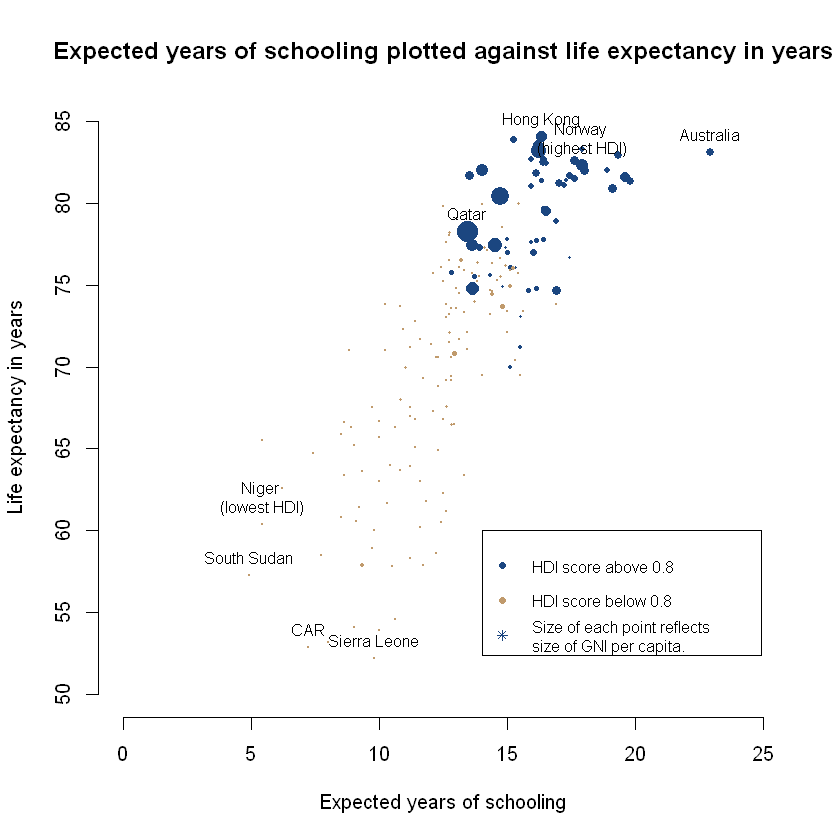

In [150]:
plot(high$Expected_years_of_schooling_in_years, high$Life_expectancy_at_birth_in_years, 
     main = "Expected years of schooling plotted against life expectancy in years",
               xlab = "Expected years of schooling", 
     ylab = "Life expectancy in years", xlim = c(0, 25), ylim = c(50, 85), lty = "blank", pch = 21, 
     bg = rgb(27, 70, 128, maxColorValue=255), col = rgb(27, 70, 128, maxColorValue=255), cex = gn/50000, bty = "n", lwd = 0.2)

points(low$Expected_years_of_schooling_in_years, low$Life_expectancy_at_birth_in_years, pch = 21, 
cex = lowgn/50000, bg = rgb(192, 154, 108, maxColorValue=255), col = rgb(192, 154, 108, maxColorValue=255))

legend(14, 60, legend = c("HDI score above 0.8", "HDI score below 0.8", "Size of each point reflects 
size of GNI per capita."), pch = c(21, 21, 8), lty = "blank", pt.bg = c(rgb(27, 70, 128, maxColorValue=255),
                                                                        rgb(192, 154, 108, maxColorValue=255)), 
       col = c(rgb(27, 70, 128, maxColorValue=255), rgb(192, 154, 108, maxColorValue=255)), cex = 0.8, lwd = 0.2)

text(17.9, 82.3, pos = 3, cex = 0.8, "Norway 
(highest HDI)")
text(5.4, 60.4, pos = 3, cex = 0.8, "Niger 
(lowest HDI)")
text(22.9, 83.1, pos = 3, cex = 0.8, "Australia")
text(4.9, 57.3, pos = 3, cex = 0.8, "South Sudan")
text(13.4, 78.3, pos = 3, cex = 0.8, "Qatar")
text(7.2, 52.9, pos = 3, cex = 0.8, "CAR")
text(16.3, 84.1, pos = 3, cex = 0.8, "Hong Kong")
text(9.8, 52.2, pos = 3, cex = 0.8, "Sierra Leone")


In [148]:
?pdf

In [149]:
pdf("hdidata.pdf", useDingbats = FALSE, width = 7.2, height = 7)

plot(high$Expected_years_of_schooling_in_years, high$Life_expectancy_at_birth_in_years, 
     main = "Expected years of schooling plotted against life expectancy in years",
               xlab = "Expected years of schooling", 
     ylab = "Life expectancy in years", xlim = c(0, 25), ylim = c(50, 85), lty = "blank", pch = 21, 
     bg = rgb(27, 70, 128, maxColorValue=255), col = rgb(27, 70, 128, maxColorValue=255), cex = gn/50000, bty = "n", lwd = 0.2)

points(low$Expected_years_of_schooling_in_years, low$Life_expectancy_at_birth_in_years, pch = 21, 
cex = lowgn/50000, bg = rgb(192, 154, 108, maxColorValue=255), col = rgb(192, 154, 108, maxColorValue=255))

legend(14, 60, legend = c("HDI score above 0.8", "HDI score below 0.8", "Size of each point reflects 
size of GNI per capita."), pch = c(21, 21, 8), lty = "blank", pt.bg = c(rgb(27, 70, 128, maxColorValue=255),
                                                                        rgb(192, 154, 108, maxColorValue=255)), 
       col = c(rgb(27, 70, 128, maxColorValue=255), rgb(192, 154, 108, maxColorValue=255)), cex = 0.8, lwd = 0.2)

text(17.9, 82.3, pos = 3, cex = 0.8, "Norway 
(highest HDI)")
text(5.4, 60.4, pos = 3, cex = 0.8, "Niger 
(lowest HDI)")
text(22.9, 83.1, pos = 3, cex = 0.8, "Australia")
text(4.9, 57.3, pos = 3, cex = 0.8, "South Sudan")
text(13.4, 78.3, pos = 3, cex = 0.8, "Qatar")
text(7.2, 52.9, pos = 3, cex = 0.8, "CAR")
text(16.3, 84.1, pos = 3, cex = 0.8, "Hong Kong")
text(9.8, 52.2, pos = 3, cex = 0.8, "Sierra Leone")

dev.off()

png 
  2